# Sentiment Analysis for Mental Health Monitoring 🤯
___

> [dataset source](https://www.kaggle.com/datasets/suchintikasarkar/sentiment-analysis-for-mental-health) 🔗

---
<img src="https://img.freepik.com/free-vector/mental-health-awareness-concept_23-2148531011.jpg" alt="Sample Image" width="100%" height="700">






```


```
---


## **About The Datset** 🧷
This comprehensive dataset is a meticulously curated collection of mental health statuses tagged from various statements. The dataset amalgamates raw data from multiple sources, cleaned and compiled to create a robust resource for developing chatbots and performing sentiment analysis.

---
## **Data Souce** 🌍
The dataset integrates information from the following Kaggle datasets:

 - 3k Conversations Dataset for Chatbot
 - Depression Reddit Cleaned
 - Human Stress Prediction
 - Predicting Anxiety in Mental Health Data
 - Mental Health Dataset Bipolar
 - Reddit Mental Health Data
 - Students Anxiety and Depression Dataset
 - Suicidal Mental Health Dataset
 - Suicidal Tweet Detection Dataset
---

###  **Datset Over View**  :

* **Description:**

    This dataset is a comprehensive collection of 50,000 text statements related to mental health, each tagged with one of seven mental health statuses. The primary purpose of this dataset is to assist in building machine learning models for classifying mental health conditions based on textual data, such as social media posts or other user-generated content.

* **Columns:**
  1. **unique_id**: A unique identifier for each entry.
  2. **statement**: A piece of text, typically a statement or comment, associated with a particular mental health status.
  3. **status**: The mental health status assigned to the statement. The possible categories are:
    - Normal
    - Depression
    - Suicidal
    - Anxiety
    - Stress
    - Bi-Polar
    - Personality Disorder

---
### **Usage** :
This dataset is ideal for training machine learning models aimed at understanding and predicting mental health conditions based on textual data.
It can be used in various applications such as:

- Chatbot development for mental health support.
- Sentiment analysis to gauge mental health trends.
-
---

### **How we use NLP Concepts**


  In our text processing methodology, we begin by removing punctuation, URLs, and hyperlinks from the statements. Additionally, we eliminate stop words, such as "is," "are," and "the," to enhance the focus on more informative terms.


  In the realm of morphological analysis, we extract the stems of the words. Subsequently, we employ a TF-IDF (Term Frequency-Inverse Document Frequency) vectorizer to transform the processed text into a vector representation. This vector is then utilized to fit the mode

---

### **Conlusion**
  in the conclusion we train and tune  a four model wich is :
  * SVM  
  * Logistic Regression
  * Neural Ntwork
  * KNN
  the first three give a Convergent results with accuracy near to 76 % , and the last one give  a 65 % acc .

```css












```

---



## Import Libraries :
---
lets start by importing the nessacary libraries

In [3]:
pip install stanza

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 36.3 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from nltk.corpus import stopwords
from imblearn.over_sampling import SMOTE

import re
import random
#from imblearn.over_sampling import RandomOverSampler
from scipy.sparse import hstack  # To combine sparse matrices
from wordcloud import WordCloud
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.regularizers import l2

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

import stanza
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [5]:
import tensorflow as tf

# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0


# Datasert Loading and Preparing

## Loading the dataset

In [29]:
df = pd.read_csv('/content/drive/MyDrive/CombinedData.csv', index_col=0)

In [30]:
df.head(3)

,statement,status
0,oh my gosh,Anxiety
1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety


**notes1:** as we se at first , we have a three column the id which we should drop it, the statment that represent the "input" and the output which is the status. so our problem is just a classification and we need to make a nlp pre processing to extract feature  as we can from the statment to make them as input to the model.

**note2:** as we say, also we wil add some statistical feature (test len) to  nlp extracted features.

## some random example :

* to see the statement how itis

In [31]:
# Group by status and get a random statement from each group
random_statements = df.groupby('status')['statement'].apply(lambda x: x.sample(n=1).iloc[0])

# Print the results
for status, statement in random_statements.items():
    print(f"Status: {status}\n")
    print(f"Statement: {statement}\n")
    print("-----------------------------------")

Status: Anxiety

Statement: Should I be concerned about stomach cancer? I’m a 24 year old male. 2 years ago I started having symptoms described below and it would come and go every couple months. So about 2 months ago I started having stomach issues with gas, being constantly full, zero appetite and little pains in my stomach. The pains faded after 2 weeks and the last 2 months it feels as if my stomach isn’t producing enough acid. I don’t know what is going on. I have zero pain during or after eating. The only symptom I have is the feeling of my food not being digested after eating and being full for hours and hours after eating. I have ZERO appetite. And also after eating my gut gets very gurgle and makes lots of noises.

I’ll even workout twice a day and fast till dinner and still have zero appetite. I usually consume 400-600 mg of caffeine wether it’s multiple cups of coffee, tea or pre workout so I don’t know if that is bad. My anxiety has been very high worrying about stomach can

---
## Data set Descriping and statistics

In [32]:
df.describe()

,statement,status
count,52681,53043
unique,51073,7
top,what do you mean?,Normal
freq,22,16351


## Missings Value Removal

In [33]:
df.isna().sum()

,0
statement,362
status,0


In [34]:
df.dropna(inplace = True)
df.isna().sum()

,0
statement,0
status,0


## What is our Labels 'target'?



In [35]:
df['status'].unique()

array(['Anxiety', 'Normal', 'Depression', 'Suicidal', 'Stress', 'Bipolar',
       'Personality disorder'], dtype=object)

## How the samples are distributed over the status ?

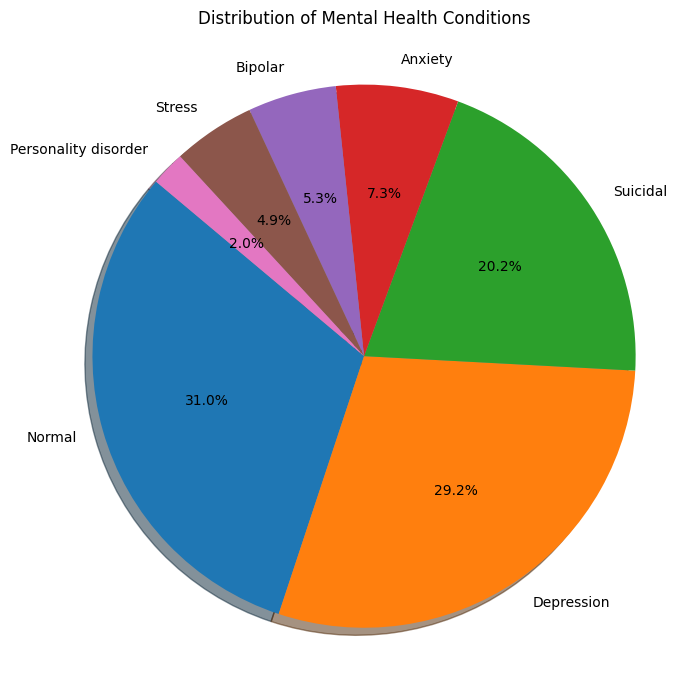

In [36]:
# Count the occurrences of each category
status_counts = df['status'].value_counts()

# Define colors for each category (7 colors for 7 categories)
colors = ['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD', '#8C564B', '#E377C2']

# Create the pie chart
plt.figure(figsize=(7, 7))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%',
        startangle=140, colors=colors, shadow=True)

plt.title('Distribution of Mental Health Conditions')
plt.axis('equal')

# Display the chart
plt.tight_layout()
plt.show()

## How the statements length are distibuted?

In [37]:
# calculate the length of each statement
df['statemnent_length'] = df['statement'].str.len()


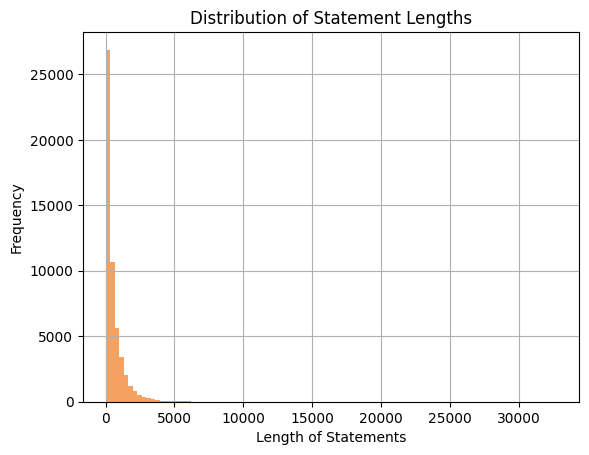

In [38]:
# plot the distribution of statement lengths
df['statemnent_length'].hist(bins=100, color='#F4A261')
plt.title('Distribution of Statement Lengths')
plt.xlabel('Length of Statements')
plt.ylabel('Frequency')
plt.show()

In [39]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['statemnent_length'].quantile(0.25)
Q3 = df['statemnent_length'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bound for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

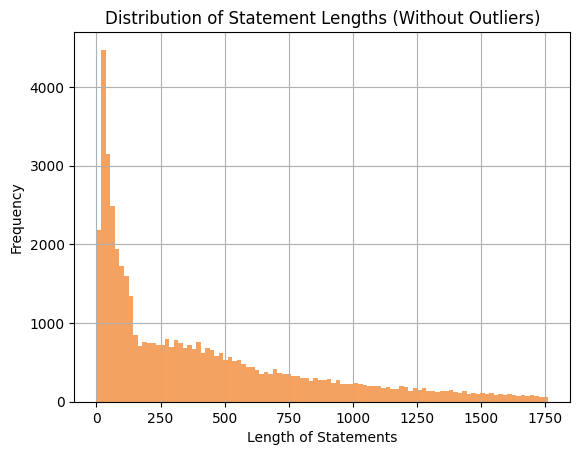

In [40]:
# Filter out the outliers
filtered_df = df[(df['statemnent_length'] >= lower_bound) & (df['statemnent_length'] <= upper_bound)]
# Plot the distribution of statement lengths without outliers
filtered_df['statemnent_length'].hist(bins=100, color='#F4A261')
plt.title('Distribution of Statement Lengths (Without Outliers)')
plt.xlabel('Length of Statements')
plt.ylabel('Frequency')
plt.show()

---
```








```
```








```
---

In [41]:
 nltk.download('stopwords')
 nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# 🦖 NLP Pre-Processing
---

in this part of the ml pipeline, we perform several essential NLP preprocessing steps to prepare our data for machine learning. These steps include:

  1. **Text Processing:**
      * include :
        - pattern reomving (links,emails and etc.)
        - lower casing
        - stop words removing

  2. **tokinezation & Stemming :**

     *  Tokenization :  
        - this step converts each text sample into an array of tokens (individual words or sub-words).
        -  we use Stanza word tokenizer to ensure precise, language-specific tokenization.
     * Stemming :
        
        - in this step, we transform each tokenized array into a stemmed version, reducing each word to its base or root form.
        - stanza NLP tools allow us to use various stemming techniques for extracting meaningful root words.
  

  3. **Part-of-Speech (POS) Tagging and Filtering**:

  - sing Stanza, we apply POS tagging to identify and filter specific parts of speech, such as:
       - **Verbs**: Identify and include only verbs to capture action-related semantics.
       - **Nouns**: Extract nouns to focus on entity- or object-based information.
       - **Adjectives**: Include adjectives to analyze descriptive language and sentiment.
  - This POS filtering allows us to tailor the input data by emphasizing different linguistic elements and can be customized based on the classification or NLP goals.



## 1. Text Processing:

### 1.1 Lower casing

In [43]:
df['statement']=df['statement'].str.lower()
df.sample(1)

,statement,status,statemnent_length
37090,thas goodi think i might go have fun too,Normal,59


### 1.2 Special Patterns Removing

 here we define our function to remoe the speacial paterns which is  :  
 1. links
 2. emails
 3. markdown text
 4. handles
 5. puctuation

In [26]:
def remove_patterns(text):

    # remove URL's
    text = re.sub(r'http[s]?://\S+', '', text)

    # remove markdown-style links
    text = re.sub(r'\[.*?\]\(.*?\)', '', text)

    # remove handles (that start with '@')
    text = re.sub(r'@\w+', '', text)

    # remove punctuation and other special characters
    text = re.sub(r'[^\w\s]', '', text)
    return text.strip()


aplying the special patterns removing

In [42]:
# apply the function to the statements
df['statement'] = df['statement'].apply(remove_patterns)

### 1.3 Remove Stop words

In [44]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return " ".join(filtered_words)

In [ ]:
df['statement'] = df['statement'].apply(remove_stopwords)

## 2.Tokenization & Stemming

 #### Intialize Stanza Piplein

In [45]:
# Initialize the Stanza NLP pipeline
stanza.download('en')
nlp = stanza.Pipeline('en', processors='tokenize')


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: en (English) ...


INFO:stanza:Downloaded file to /root/stanza_resources/en/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |
| mwt       | combined |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Done loading processors!


### 2.1 Tokenization

#### How the sentences frequency is ?

In [46]:
# Calculate the number of sentences for each statement
df['num_of_sentences'] = df['statement'].apply(lambda x: len(nlp(x).sentences))

df.sample(5)  # Display a sample of the DataFrame

,statement,status,statemnent_length,num_of_sentences
24884,i have been dealing with depression for a very...,Depression,768,1
17327,after 83 days i could talk to them and now we ...,Depression,176,1
48419,i systematically throw up before having a zoom...,Stress,1215,4
37912,month almost of being chronically unwell and n...,Depression,521,1
32997,that hotel was terrible,Normal,24,1


bar chart for the num f scentences and its frequency

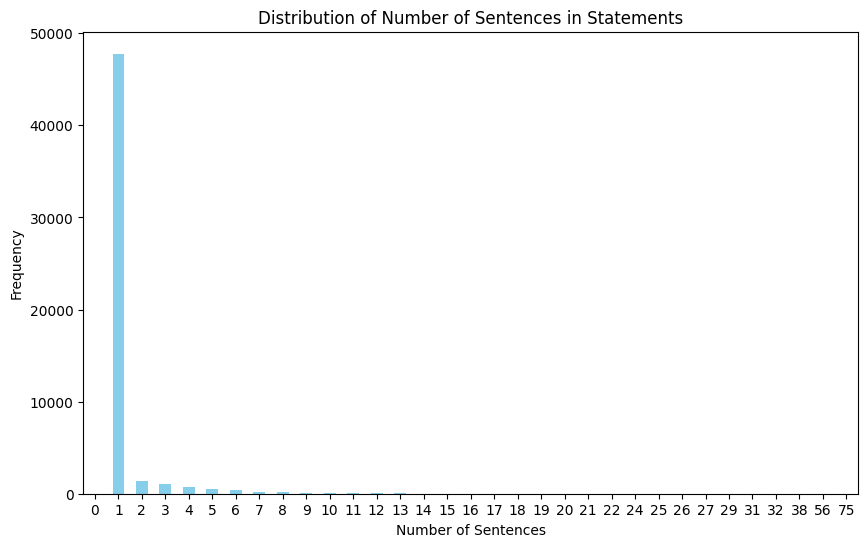

In [47]:
# Plot distribution of the number of sentences
plt.figure(figsize=(10, 6))
df['num_of_sentences'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Number of Sentences in Statements')
plt.xlabel('Number of Sentences')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

#### Words tokenization

define word tokenizing funcyion

In [50]:
def extract_tokens(text):
  doc=nlp(text)
  words = [word.text for sentence in doc.sentences for word in sentence.words]
  return words

apply extract tokenz function

In [48]:
# apply word tokenize to each element in the statements
df['tokens'] = df['statement'].apply(extract_tokens)


,statement,status,statemnent_length,num_of_sentences,tokens
28741,background this time last year i lost my job g...,Stress,385,1,"[background, this, time, last, year, i, lost, ..."
51395,i dont know why im so selfdefeating i cant hel...,Personality disorder,2037,4,"[i, do, nt, know, why, i, m, so, selfdefeating..."
42563,mycaricature the only bit that got me really w...,Normal,128,1,"[mycaricature, the, only, bit, that, got, me, ..."
28571,a little background here the girlfriend24f of ...,Normal,546,1,"[a, little, background, here, the, girlfriend,..."
155,restless and agitated,Anxiety,21,1,"[restless, and, agitated]"


#### Sample after tokenizing

In [52]:
df.sample(2)

,statement,status,statemnent_length,num_of_sentences,tokens
51554,can you relate to these i wanna know if you gu...,Personality disorder,493,2,"[can, you, relate, to, these, i, wan, na, know..."
22402,i feel so alone all the time no one ever gets ...,Depression,428,1,"[i, feel, so, alone, all, the, time, no, one, ..."


### 2.2 Stemming

#### Intializing the steemer

In [59]:
# Initialize the stemmer
stemmer = nltk.SnowballStemmer("english")

# Function to stem tokens
def tokens_stem(tokens):
    # Extract and stem each token
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)


#### Apply the stemming Function

In [60]:
df['tokens_stemmed'] = df['tokens'].apply(tokens_stem)

#### Sample

In [62]:
# Display sample of the DataFrame
df.sample(5)

,statement,status,statemnent_length,num_of_sentences,tokens,tokens_stemmed
5527,okay i think i have to buy soto kwali gemolong...,Normal,87,1,"[okay, i, think, i, have, to, buy, soto, kwali...",okay i think i have to buy soto kwali gemolong...
27922,i recently went through an event that was extr...,Stress,458,1,"[i, recently, went, through, an, event, that, ...",i recent went through an event that was extrem...
50818,feeling like i dont do enough im not sure if t...,Personality disorder,2380,5,"[feeling, like, i, do, nt, do, enough, im, not...",feel like i do nt do enough im not sure if thi...
11585,so i am 14 and right when 2021 started i moved...,Suicidal,1216,1,"[so, i, am, 14, and, right, when, 2021, starte...",so i am 14 and right when 2021 start i move sc...
11397,i am 20 years old m and have been having recur...,Depression,1371,1,"[i, am, 20, years, old, m, and, have, been, ha...",i am 20 year old m and have been have recur ni...


---

```



```
---


### 2.3 word counts

In [63]:
colors = ['#16325B', '#227B94', '#78B7D0', '#FFDC7F', '#18587A', '#11999E', '#283644']

# Define a color function
def color_func(word, font_size, position, orientation, random_state=101, **kwargs):
    return random.choice(colors)

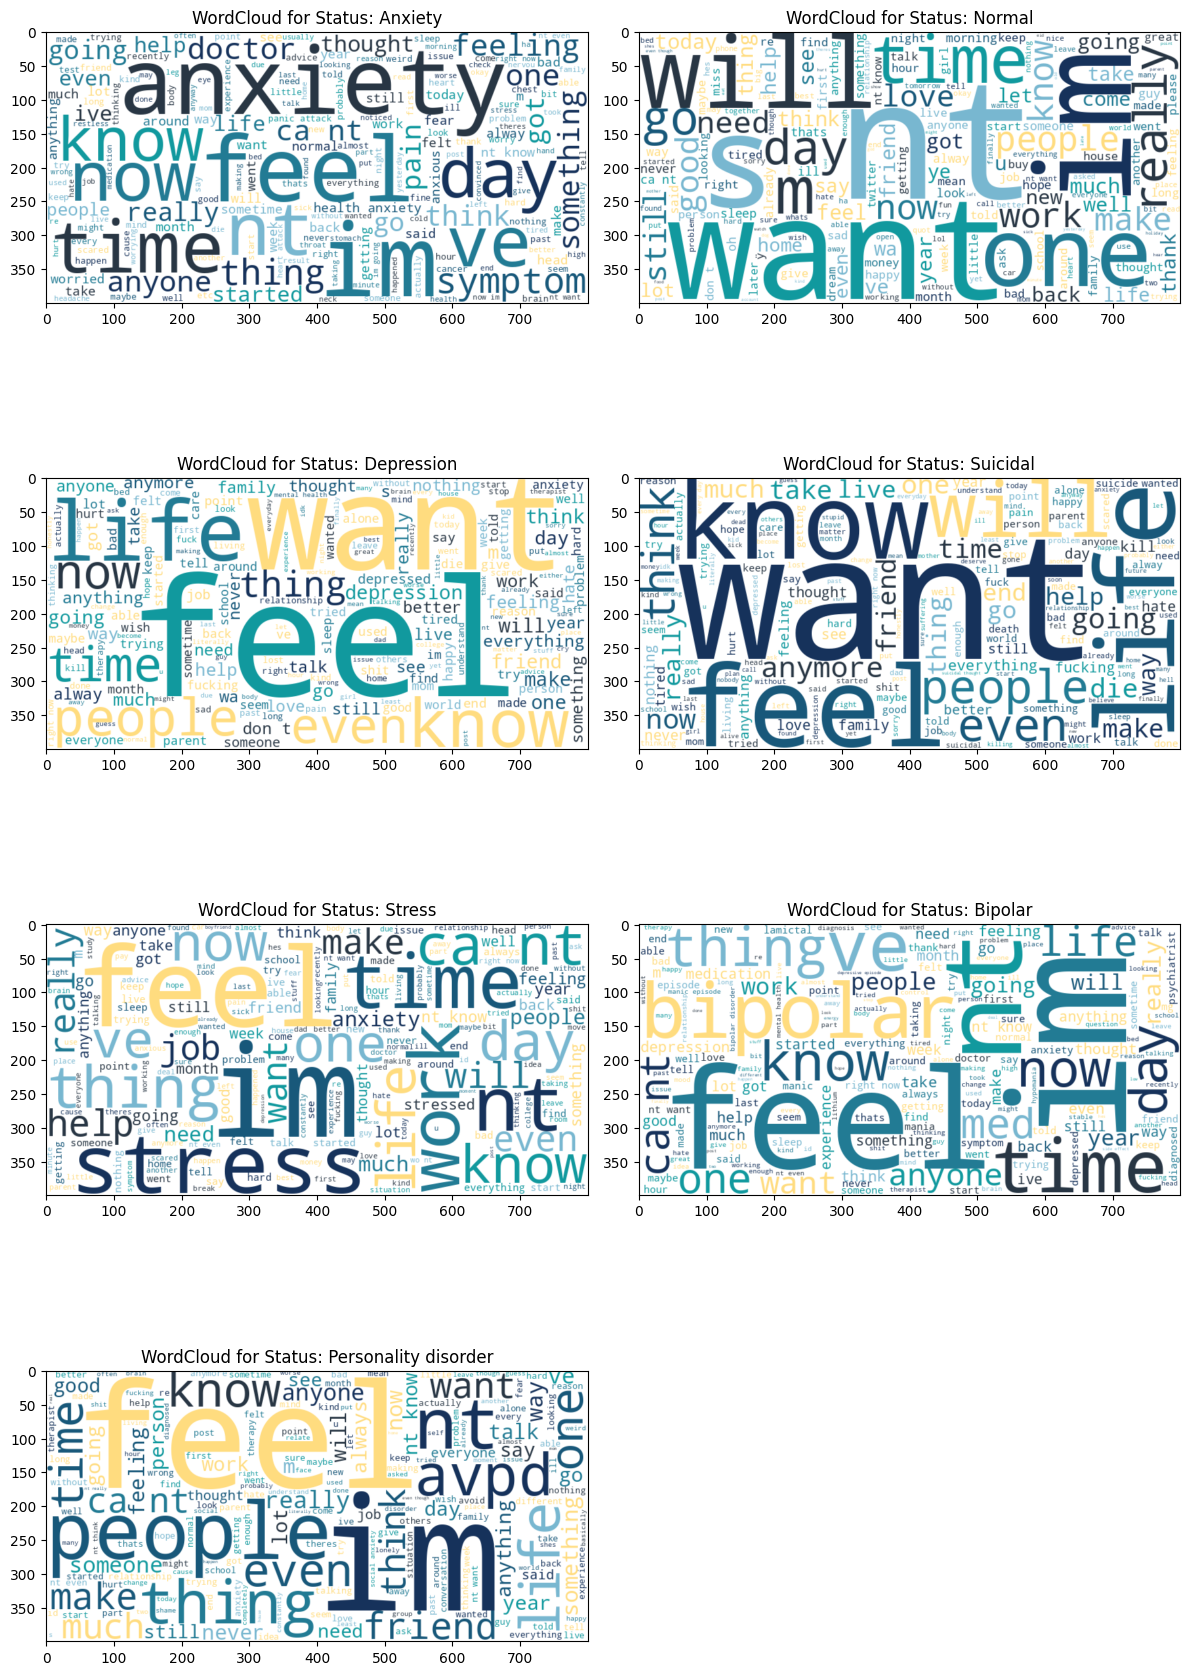

In [64]:
statuses = df['status'].unique()

plt.figure(figsize=(12, 36))  # Adjust figure size as needed

# Generate and plot the WordCloud for each category
for i, status in enumerate(statuses):
    # Filter the tokens data for the current status
    tokens_data = ' '.join(df[df['status'] == status]['tokens'].dropna().apply(lambda x: ' '.join(x)).tolist())

    # Generate the WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=color_func).generate(tokens_data)

    # Plot the WordCloud in a subplot
    axes = plt.subplot(len(statuses) // 2 + 1, 2, i + 1)  # Adjust number of rows and columns dynamically
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'WordCloud for Status: {status}')
    #plt.axis('off')  # Turn off axes for a cleaner look

# Apply tight layout after generating all subplots
plt.tight_layout()

# Adjust the vertical spacing between subplots (hspace controls vertical space)
plt.subplots_adjust(hspace= -0.8)
plt.show()

---
```








```
---



## 3. Part-Of-Speach (POS) Tagging

### 3.1 Extract POS Taggs

##### Nlp

In [80]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [75]:
nlp = stanza.Pipeline(lang='en', processors='tokenize,mwt,pos')

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package         |
-------------------------------
| tokenize  | combined        |
| mwt       | combined        |
| pos       | combined_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Done loading processors!


#### define function to extract pos

In [81]:
import nltk

def extract_pos_tokens(text, pos_tag_prefix):
    # Tokenize the input text
    tokens = nltk.word_tokenize(text)
    # Get the POS tags
    pos_tags = nltk.pos_tag(tokens)

    # Extract tokens based on POS tag prefix
    tokens_filtered = [word for word, pos in pos_tags if pos.startswith(pos_tag_prefix)]

    return ' '.join(tokens_filtered)

#### Extract Verbs

In [82]:
df['tokens_verbs'] = df['statement'].apply(lambda x: extract_pos_tokens(x, 'V'))

#### Extract Nouns

In [84]:
df['tokens_nouns'] = df['statement'].apply(lambda x: extract_pos_tokens(x, 'N'))

#### Extrac Adjectives

In [85]:
df['tokens_adj'] = df['statement'].apply(lambda x: extract_pos_tokens(x, 'J'))

#### Sample

In [86]:
df.sample(2)

,statement,status,statemnent_length,num_of_sentences,tokens,tokens_stemmed,tokens_verbs,tokens_nouns,tokens_adj
34987,dvt anxiety hi all \n\nampx200b\n\nso starting...,Anxiety,1209,7,"[dvt, anxiety, hi, all, ampx200b, so, starting...",dvt anxieti hi all ampx200b so start monday mo...,hi starting started hurt go examining has swol...,dvt anxiety ampx200b morning right leg ankle m...,monday thigh weird vein pulled twisted i count...
11424,i do not know what i am going to get from this...,Suicidal,904,1,"[i, do, not, know, what, i, am, going, to, get...",i do not know what i am go to get from this bu...,do know i am going get i wanted feeling am gon...,i i feelings i friend fight sister mom i perso...,open best i i little i


## About VEctorizing Approach

**What is the TF (Term of Frequency) and IDF (Inverse Document Frequency)?**

---
```


```
---

* **What is TF-IDF?**

TF-IDF (Term Frequency-Inverse Document Frequency) is a numerical statistic used to evaluate the importance of a word in a document relative to a collection of documents, typically in the context of text mining and Natural Language Processing (NLP). It is commonly used as a feature extraction method to convert textual data into numerical features that machine learning models can process.

* The TF-IDF measure combines two components:

  1. **Term Frequency (TF):**

  **Definition:** The number of times a word (term) appears in a document, divided by the total number of words in that document. It gives us a sense of how important a word is within a single document.

  **Formula:**

   \begin{align}
   \text{TF}(t, d) = \frac{\text{Number of times term } t \text{ appears in document } d}{\text{Total number of terms in document } d}
   \end{align}

  
  2. **Inverse Document Frequency (IDF):**
  
    **Definition:** The logarithm of the total number of documents in the corpus divided by the number of documents containing the term.
  
    It measures how important a word is across the whole corpus. Common words that appear in many documents (like "the," "is") have low IDF values because they are less informative, while rare terms have higher IDF values.

    **Formula:**



  \begin{align}
   \text{IDF}(t, D) = \log \left( \frac{\text{Total number of documents in the corpus}}{1 + \text{Number of documents containing the term } t} \right)
 \end{align}

3. **TF-IDF:**

  **Definition:** The product of the term frequency (TF) and inverse document frequency (IDF) for a term in a document. It reflects both the term's frequency within a specific document and how unique or important the term is across the entire document corpus.
  
  **Formula:**

   \begin{align}
   \text{TF-IDF}(t, d, D) = \text{TF}(t, d) \times \text{IDF}(t, D)
   \end{align}

  In these formulas:
  - \( t \) refers to a term (word),
  - \( d \) refers to a document,
  - \( D \) refers to the entire corpus (collection of documents),
  - \( \log \) is the logarithm function, typically base 10 or natural logarithm.


* **How TF-IDF is Useful**
  **Feature Extraction in NLP:** TF-IDF helps convert raw text data into a matrix of numerical features, making the data suitable for machine learning models. Each document is represented as a vector of TF-IDF values, where each value corresponds to the importance of a word in that document. This is a common technique in text classification tasks, such as sentiment analysis, spam detection, and topic classification.

  **Captures the Importance of Words:** By using TF-IDF, we can ignore frequently occurring but uninformative words (e.g., "the", "and") and focus on more meaningful terms that are key to the context of a document. This helps improve the accuracy and relevance of the model's predictions by emphasizing words that differentiate one document from another.

  **Reduces Noise in Text:** TF-IDF reduces the weight of very common words across all documents, as they are often not useful for distinguishing between documents. It assigns higher importance to rare and meaningful terms, which tend to carry more information about the content of the document.

  **Improves Text Similarity Measures:** TF-IDF vectors are often used to calculate the similarity between documents (e.g., using cosine similarity). This is useful in tasks like document clustering, search engines, and recommendation systems.

  
* **Use Case in Mental Health Sentiment Analysis**

  In our dataset, which contains mental health-related statements, applying TF-IDF can help the model understand which words are most significant for predicting the mental health status of a given statement. For example:

    - Words like "hopeless," "depressed," and "suicidal" may have high TF-IDF scores in documents labeled with "Depression" or "Suicidal" mental health statuses, but these words may be rare across other categories.
  
   - Common words like "I," "the," and "is" will have low IDF values since they appear in many documents, making them less useful for classification.

  By transforming the text data into TF-IDF vectors, you provide a more informative and compact representation of the statements, which can lead to better performance of machine learning models.



---
```









```
---

#  Data Spliting


## Taking Features

In [110]:
X = df[['tokens_stemmed','tokens_verbs','tokens_nouns','tokens_adj']]
y = df['status']

# Combine X and y into a single DataFrame
combined = X.copy()
combined['status'] = y

# Drop rows with any NaN values in the combined DataFrame
combined = combined.dropna()

# Separate back into features (X) and target (y)
X_clean = combined[['tokens_stemmed', 'tokens_verbs', 'tokens_nouns', 'tokens_adj']]
y_clean = combined['status']


## labels encodig

In [111]:
lbl_enc = LabelEncoder()
y = lbl_enc.fit_transform(y.values)

## Splitting the dataset

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=601)

# Second split: Temporary set into validation and test sets (50% of the temp set goes to validation, 50% to test)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=601)


# Vectorizing
---
* Convert text to features using TF-IDF vectoriser

### Vectorizing the stemmes

In [207]:
# 1. Initialize TF-IDF Vectorizer and fit/transform on the 'tokens' column
vectorizer = TfidfVectorizer(max_features=3000,ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train['tokens_stemmed'])
# X_val_tfidf = vectorizer.transform(X_val['tokens_stemmed'])  # Transform validation set
X_test_tfidf = vectorizer.transform(X_test['tokens_stemmed'])  # Transform test set

# 2.  Extract numerical features for train, validation, and test
# X_train_num = X_train[['statement_length', 'num_of_sentences']].values
# X_val_num = X_val[['statement_length', 'num_of_sentences']].values
# X_test_num = X_test[['statement_length', 'num_of_sentences']].values

# 3. Combine TF-IDF features (and numerical features if used) for train, validation, and test
X_stemm_train = hstack([X_train_tfidf])

X_stemm_test = hstack([X_test_tfidf])

# Print number of features used
print('Number of feature words: ', len(vectorizer.get_feature_names_out()))


Number of feature words:  3000


## Verbs-Vector

In [145]:
# 1. Initialize TF-IDF Vectorizer and fit/transform on the 'tokens' column
vectorizer = TfidfVectorizer(max_features=1000)
X_verbs_train_tfidf = vectorizer.fit_transform(X_train['tokens_verbs'].astype(str))
X_verbs_test_tfidf = vectorizer.transform(X_test['tokens_verbs'])  # Transform test set


# 3. Combine TF-IDF features (and numerical features if used) for train, validation, and test
X_verbs_train = hstack([X_verbs_train_tfidf])
X_verbs_test = hstack([X_verbs_test_tfidf])

# Print number of features used
print('Number of feature words: ', len(vectorizer.get_feature_names_out()))


Number of feature words:  1000


## Nouns-Vector

In [113]:
print(type(X_train))
print(X_train.shape)
print(X_train.head())  # Show the first few rows


<class 'pandas.core.frame.DataFrame'>
(36876, 4)
                                          tokens_stemmed  \
36847          happi birthdaaaaayyy bebe ðgodbless youuu   
6034   what if we both get into a gang of crimin i to...   
14905  i am a liar for tell peopl stuff like oh i pro...   
2084               oneus is cri for his babi pictur geme   
46382  what did you wish you knew sooner if you could...   

                                            tokens_verbs  \
36847                                                      
6034                                     get i took took   
14905  am telling stuff promise be do hang promise st...   
2084                                           is crying   
46382  did wish knew go tell wish knew be say do is e...   

                                            tokens_nouns  \
36847                birthdaaaaayyy bebe ðgodbless youuu   
6034                          gang criminals heart heart   
14905  i liar people oh i anymore promise school 

In [114]:
# 1. Initialize TF-IDF Vectorizer and fit/transform on the 'tokens' column
vectorizer = TfidfVectorizer(max_features=1000)
# Ensure 'tokens_verbs' is string and remove empty strings
X_train['tokens_verbs'] = X_train['tokens_verbs'].astype(str).str.strip()
X_test['tokens_verbs'] = X_test['tokens_verbs'].astype(str).str.strip()

X_nouns_train_tfidf = vectorizer.fit_transform(X_train['tokens_nouns'])
X_nouns_test_tfidf = vectorizer.transform(X_test['tokens_nouns'])  # Transform test set


# 3. Combine TF-IDF features (and numerical features if used) for train, validation, and test
X_nouns_train = hstack([X_nouns_train_tfidf])
X_nouns_test = hstack([X_nouns_test_tfidf])

# Print number of features used
print('Number of feature words: ', len(vectorizer.get_feature_names_out()))


Number of feature words:  1000


## Adjectives-Vector

In [193]:
# 1. Initialize TF-IDF Vectorizer and fit/transform on the 'tokens' column
vectorizer = TfidfVectorizer(max_features=1000,ngram_range=(1, 2))
X_adj_train_tfidf = vectorizer.fit_transform(X_train['tokens_adj'])
X_adj_test_tfidf = vectorizer.transform(X_test['tokens_adj'])  # Transform test set


# 3. Combine TF-IDF features (and numerical features if used) for train, validation, and test
X_adj_train = hstack([X_adj_train_tfidf])
X_adj_test = hstack([X_adj_test_tfidf])

# Print number of features used
print('Number of feature words: ', len(vectorizer.get_feature_names_out()))


Number of feature words:  1000


## Weighted-Vector

In [214]:
# Define weights for each POS feature type
verb_weight = 0.5
noun_weight = 3.0
adj_weight = 1.8

# Apply weights and combine features
X_weighted_train = hstack([
    X_verbs_train_tfidf * verb_weight,
    X_nouns_train_tfidf * noun_weight,
    X_adj_train_tfidf * adj_weight
])
# Apply weights and combine features
X_weighted_test = hstack([
    X_verbs_test_tfidf * verb_weight,
    X_nouns_test_tfidf * noun_weight,
    X_adj_test_tfidf * adj_weight
])

#  Resampling very importing remmember

In [ ]:
# Convert TF-IDF sparse matrix to dense format for SMOTE
# X_train_dense = X_train_tfidf.toarray()

# Apply SMOTE to the dense matrix
# smote = SMOTE(random_state=42)

# X_train_combined, y_train = smote.fit_resample(X_train_dense, y_train)


```css







```

# Model Trainging

## Prepare The Models

### LOgisic model

In [196]:
# Define the LogisticRegression model
clf = LogisticRegression(solver='liblinear', random_state=101)

# Define the hyperparameter grid to search over
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)



### Neural Netowrk

## Training Based on Verb-Vector

### 🖇 Logistic Regression Model

#### Grid CV

In [142]:
# Fit the grid search on the training data
grid_search.fit(X_verbs_train, y_train)



Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=101, solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='accuracy', verbose=1)

#### Best params

In [143]:
# Get the best model and hyperparameters
best_clf = grid_search.best_estimator_
print("Best hyperparameters found: ", grid_search.best_params_)


Best hyperparameters found:  {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


#### Confusion Matrix

In [144]:
#  Predict on the test set using the best model
y_pred = best_clf.predict(X_verbs_test)

#  Calculate accuracy
accuracy_reg = accuracy_score(y_test, y_pred)
print("\nAccuracy: ", accuracy_reg)

#  Compute the confusion matrix and classification report
conf_matrix_reg = confusion_matrix(y_test, y_pred)
labels = lbl_enc.classes_
print(classification_report(y_test, y_pred, target_names=labels))


Accuracy:  0.6561214805441316
                      precision    recall  f1-score   support

             Anxiety       0.65      0.52      0.57      1200
             Bipolar       0.54      0.40      0.46       812
          Depression       0.60      0.62      0.61      4600
              Normal       0.76      0.91      0.83      4895
Personality disorder       0.60      0.37      0.46       316
              Stress       0.53      0.30      0.38       790
            Suicidal       0.60      0.56      0.58      3192

            accuracy                           0.66     15805
           macro avg       0.61      0.52      0.55     15805
        weighted avg       0.64      0.66      0.64     15805



#### Heat Map

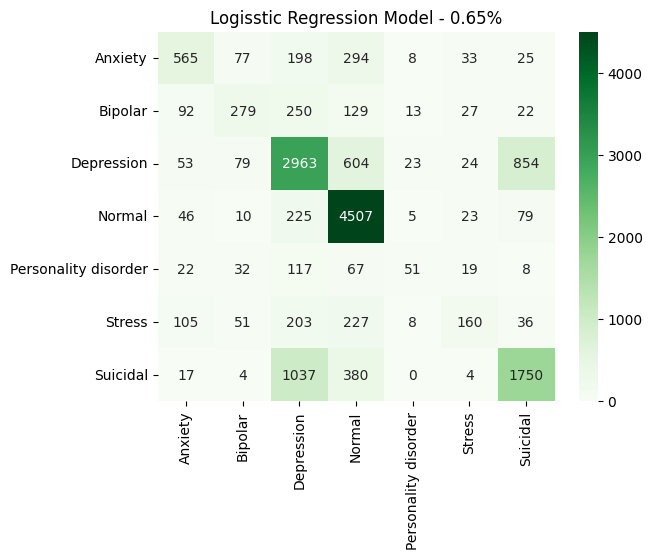

In [127]:
ax = sns.heatmap(conf_matrix_reg, annot = True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
ax.set_title(f'Logisstic Regression Model - {accuracy_reg:.2}%')
plt.show()

### Nerual Network

In [147]:
# Define the layers in an array
layers = [
    Dense(units=128, activation='relu', input_shape=(X_verbs_train.shape[1],),kernel_regularizer=l2(0.01)),  # Input Layer
    BatchNormalization(),
    Dropout(rate=0.2),  # Dropout Layer 1
    Dense(units=64, activation='relu',kernel_regularizer=l2(0.01)),  # Hidden Layer 1
    Dropout(rate=0.1),  # Dropout Layer 1
    Dense(units=16, activation='relu',kernel_regularizer=l2(0.01)),  # Hidden Layer 2

    Dropout(rate=0.2),  # Dropout Layer 2
    Dense(units=len(lbl_enc.classes_), activation='softmax')  # Output Layer
]

# Initialize the Sequential model
model = Sequential(layers)


# Compile the model: Using Adam optimizer, sparse categorical crossentropy loss, and accuracy as the metric
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [148]:

# Train the model on training data with validation on the test data
history = model.fit(X_verbs_train.toarray(),
                    y_train,
                    epochs=20,
                    batch_size=64,
                    validation_split=0.3
                    )


Epoch 1/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4645 - loss: 3.0214 - val_accuracy: 0.5397 - val_loss: 1.6490
Epoch 2/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6067 - loss: 1.3122 - val_accuracy: 0.6333 - val_loss: 1.1986
Epoch 3/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6166 - loss: 1.2166 - val_accuracy: 0.6313 - val_loss: 1.1628
Epoch 4/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6209 - loss: 1.1863 - val_accuracy: 0.6336 - val_loss: 1.1533
Epoch 5/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6273 - loss: 1.1689 - val_accuracy: 0.6349 - val_loss: 1.1401
Epoch 6/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6291 - loss: 1.1550 - val_accuracy: 0.6387 - val_loss: 1.1343
Epoch 7/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6321 - loss: 1.1523 - val_accuracy: 0.6392 - val_loss: 1.1242
Epoch 8/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6336 - loss: 1.1359 - val_accuracy: 0.

In [151]:

# Make predictions on the test set
y_pred_prob = model.predict(X_verbs_test.toarray())
y_pred = y_pred_prob.argmax(axis=1)  # Convert probabilities to class predictions

# Calculate the accuracy
accuracy_nn = accuracy_score(y_test, y_pred)
print("\n")
print("Accuracy:", accuracy_nn)

# Compute the confusion matrix
labels = lbl_enc.classes_
conf_matrix_nn = confusion_matrix(y_test, y_pred)

# Print classification report
print(classification_report(y_test, y_pred, target_names=labels))


494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Accuracy: 0.6360645365390699
                      precision    recall  f1-score   support

             Anxiety       0.60      0.47      0.53      1200
             Bipolar       0.30      0.55      0.39       812
          Depression       0.62      0.57      0.60      4600
              Normal       0.77      0.90      0.83      4895
Personality disorder       0.00      0.00      0.00       316
              Stress       0.23      0.02      0.04       790
            Suicidal       0.60      0.63      0.61      3192

            accuracy                           0.64     15805
           macro avg       0.45      0.45      0.43     15805
        weighted avg       0.61      0.64      0.62     15805



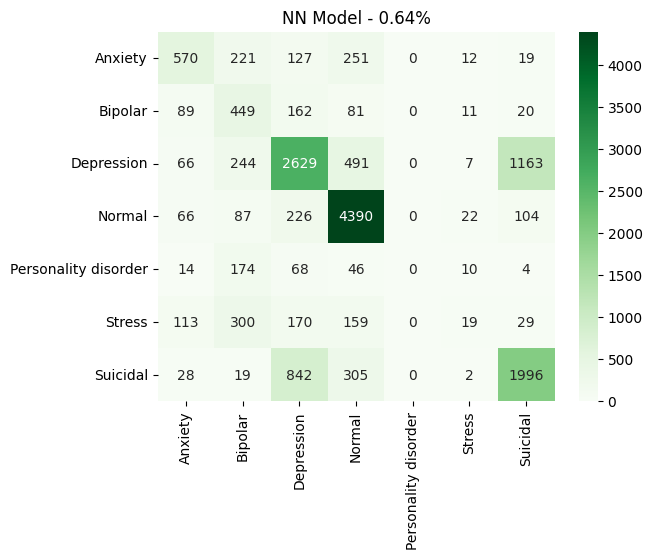

In [152]:
ax = sns.heatmap(conf_matrix_nn, annot = True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
ax.set_title(f'NN Model - {accuracy_nn:.2}%')
plt.show()

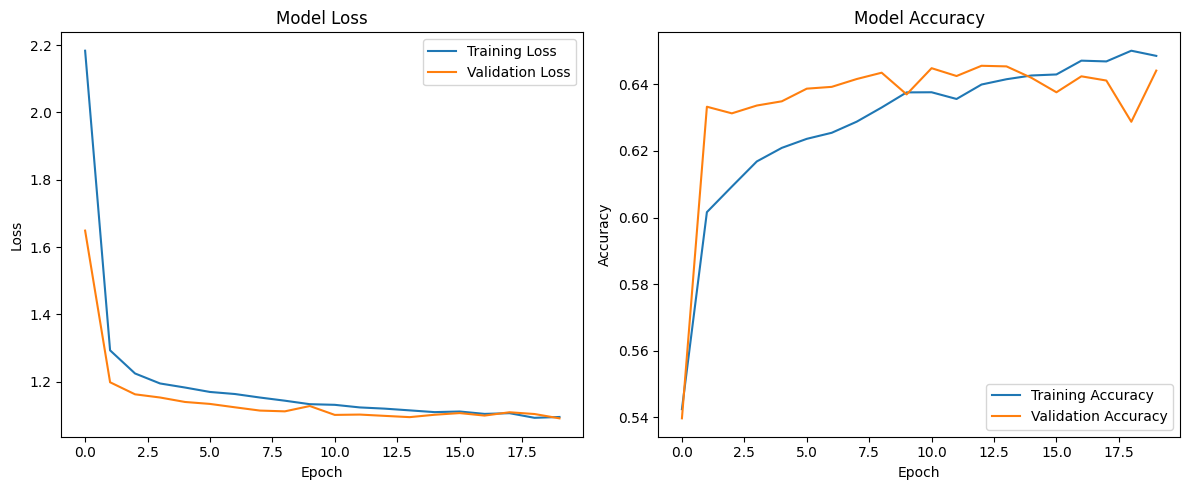

In [154]:
plt.figure(figsize=(12, 5))

# Plot training & validation loss values
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.tight_layout()  # Adjusts subplots to fit in the figure area.
plt.show()  # Display the plots

## Training Based on Nouns-Vector

### 🖇 Logistic Regression Model

#### Grid CV

In [155]:
# Fit the grid search on the training data
grid_search.fit(X_nouns_train, y_train)



Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=101, solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='accuracy', verbose=1)

#### Best params

In [156]:
# Get the best model and hyperparameters
best_clf = grid_search.best_estimator_
print("Best hyperparameters found: ", grid_search.best_params_)


Best hyperparameters found:  {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


#### Confusion Matrix

In [ ]:
#  Predict on the test set using the best model
y_pred = best_clf.predict(X_nouns_test)

#  Calculate accuracy
accuracy_reg = accuracy_score(y_test, y_pred)
print("\nAccuracy: ", accuracy_reg)

#  Compute the confusion matrix and classification report
conf_matrix_reg = confusion_matrix(y_test, y_pred)
labels = lbl_enc.classes_
print(classification_report(y_test, y_pred, target_names=labels))


Accuracy:  0.6561214805441316
                      precision    recall  f1-score   support

             Anxiety       0.65      0.52      0.57      1200
             Bipolar       0.54      0.40      0.46       812
          Depression       0.60      0.62      0.61      4600
              Normal       0.76      0.91      0.83      4895
Personality disorder       0.60      0.37      0.46       316
              Stress       0.53      0.30      0.38       790
            Suicidal       0.60      0.56      0.58      3192

            accuracy                           0.66     15805
           macro avg       0.61      0.52      0.55     15805
        weighted avg       0.64      0.66      0.64     15805



#### Heat Map

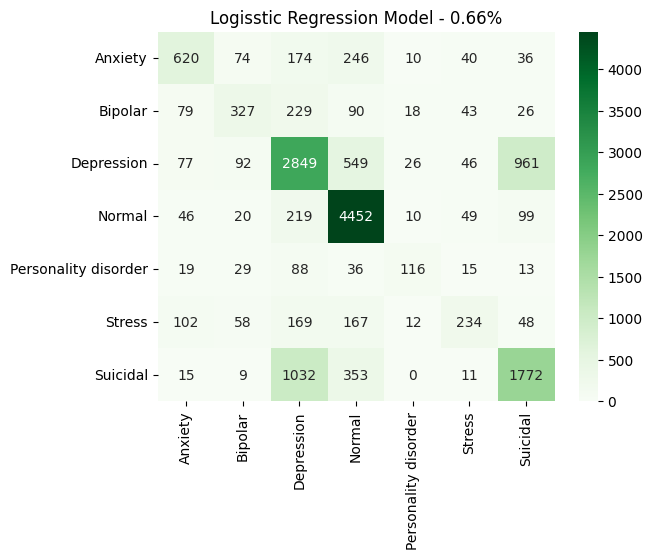

In [157]:
ax = sns.heatmap(conf_matrix_reg, annot = True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
ax.set_title(f'Logisstic Regression Model - {accuracy_reg:.2}%')
plt.show()

### Nerual Network

In [158]:
# Define the layers in an array
layers = [
    Dense(units=128, activation='relu', input_shape=(X_nouns_train.shape[1],),kernel_regularizer=l2(0.01)),  # Input Layer
    BatchNormalization(),
    Dropout(rate=0.2),  # Dropout Layer 1
    Dense(units=64, activation='relu',kernel_regularizer=l2(0.01)),  # Hidden Layer 1
    Dropout(rate=0.1),  # Dropout Layer 1
    Dense(units=16, activation='relu',kernel_regularizer=l2(0.01)),  # Hidden Layer 2

    Dropout(rate=0.2),  # Dropout Layer 2
    Dense(units=len(lbl_enc.classes_), activation='softmax')  # Output Layer
]

# Initialize the Sequential model
model = Sequential(layers)


# Compile the model: Using Adam optimizer, sparse categorical crossentropy loss, and accuracy as the metric
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [159]:

# Train the model on training data with validation on the test data
history = model.fit(X_nouns_train.toarray(),
                    y_train,
                    epochs=20,
                    batch_size=64,
                    validation_split=0.3
                    )


Epoch 1/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4428 - loss: 3.0577 - val_accuracy: 0.5985 - val_loss: 1.5855
Epoch 2/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6381 - loss: 1.2915 - val_accuracy: 0.6551 - val_loss: 1.1549
Epoch 3/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6511 - loss: 1.1721 - val_accuracy: 0.6658 - val_loss: 1.1066
Epoch 4/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6501 - loss: 1.1551 - val_accuracy: 0.6558 - val_loss: 1.1033
Epoch 5/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6526 - loss: 1.1360 - val_accuracy: 0.6636 - val_loss: 1.0784
Epoch 6/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6588 - loss: 1.1266 - val_accuracy: 0.6633 - val_loss: 1.0683
Epoch 7/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6595 - loss: 1.1058 - val_accuracy: 0.6696 - val_loss: 1.0537
Epoch 8/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6657 - loss: 1.0883 - val_accuracy: 0.

In [160]:

# Make predictions on the test set
y_pred_prob = model.predict(X_nouns_test.toarray())
y_pred = y_pred_prob.argmax(axis=1)  # Convert probabilities to class predictions

# Calculate the accuracy
accuracy_nn = accuracy_score(y_test, y_pred)
print("\n")
print("Accuracy:", accuracy_nn)

# Compute the confusion matrix
labels = lbl_enc.classes_
conf_matrix_nn = confusion_matrix(y_test, y_pred)

# Print classification report
print(classification_report(y_test, y_pred, target_names=labels))


494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Accuracy: 0.6777602024675735
                      precision    recall  f1-score   support

             Anxiety       0.64      0.65      0.64      1200
             Bipolar       0.68      0.60      0.64       812
          Depression       0.65      0.65      0.65      4600
              Normal       0.77      0.90      0.83      4895
Personality disorder       0.64      0.28      0.39       316
              Stress       0.45      0.38      0.41       790
            Suicidal       0.60      0.51      0.55      3192

            accuracy                           0.68     15805
           macro avg       0.63      0.57      0.59     15805
        weighted avg       0.67      0.68      0.67     15805



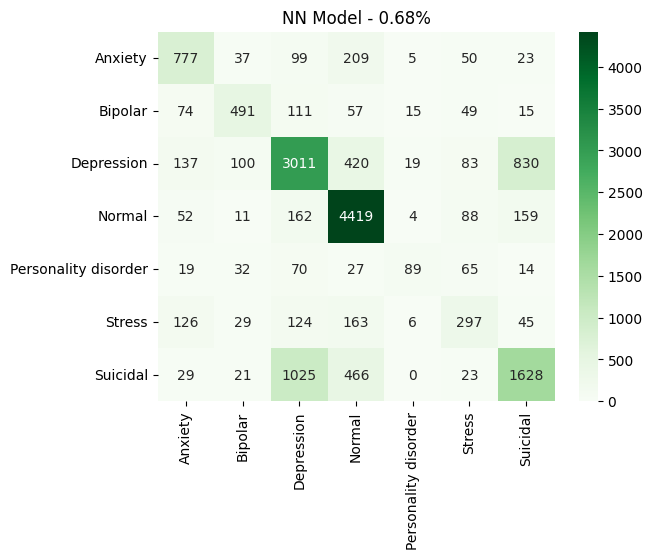

In [161]:
ax = sns.heatmap(conf_matrix_nn, annot = True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
ax.set_title(f'NN Model - {accuracy_nn:.2}%')
plt.show()

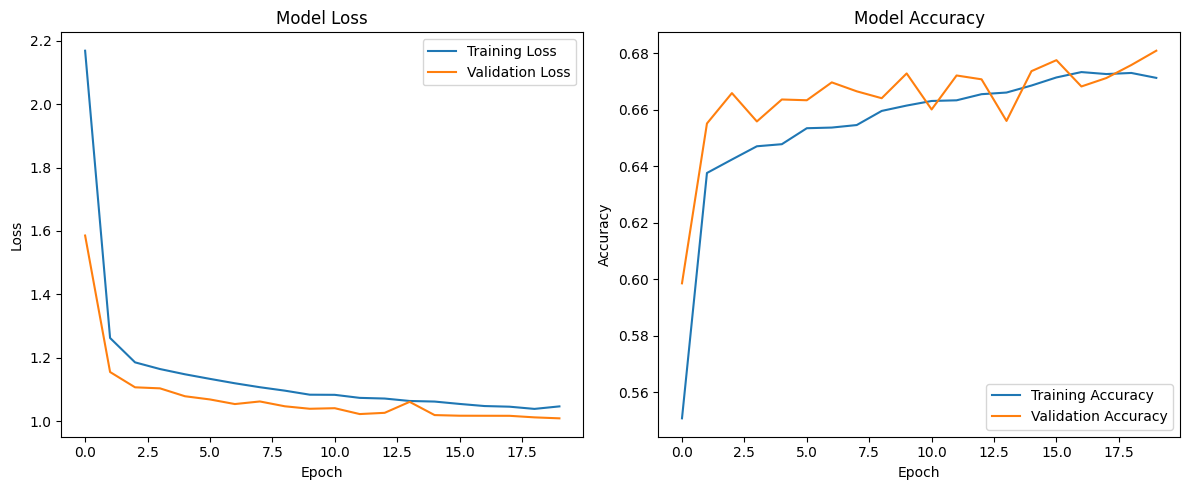

In [162]:
plt.figure(figsize=(12, 5))

# Plot training & validation loss values
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.tight_layout()  # Adjusts subplots to fit in the figure area.
plt.show()  # Display the plots

## Training Based on Adjective-Vector

### 🖇 Logistic Regression Model

#### Grid CV

In [163]:
# Fit the grid search on the training data
grid_search.fit(X_adj_train, y_train)



Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=101, solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='accuracy', verbose=1)

#### Best params

In [164]:
# Get the best model and hyperparameters
best_clf = grid_search.best_estimator_
print("Best hyperparameters found: ", grid_search.best_params_)


Best hyperparameters found:  {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


#### Confusion Matrix

In [165]:
#  Predict on the test set using the best model
y_pred = best_clf.predict(X_adj_test)

#  Calculate accuracy
accuracy_reg = accuracy_score(y_test, y_pred)
print("\nAccuracy: ", accuracy_reg)

#  Compute the confusion matrix and classification report
conf_matrix_reg = confusion_matrix(y_test, y_pred)
labels = lbl_enc.classes_
print(classification_report(y_test, y_pred, target_names=labels))


Accuracy:  0.6006959822840873
                      precision    recall  f1-score   support

             Anxiety       0.62      0.52      0.57      1200
             Bipolar       0.72      0.53      0.61       812
          Depression       0.53      0.59      0.56      4600
              Normal       0.69      0.88      0.77      4895
Personality disorder       0.68      0.25      0.36       316
              Stress       0.45      0.17      0.25       790
            Suicidal       0.51      0.39      0.44      3192

            accuracy                           0.60     15805
           macro avg       0.60      0.47      0.51     15805
        weighted avg       0.59      0.60      0.58     15805



#### Heat Map

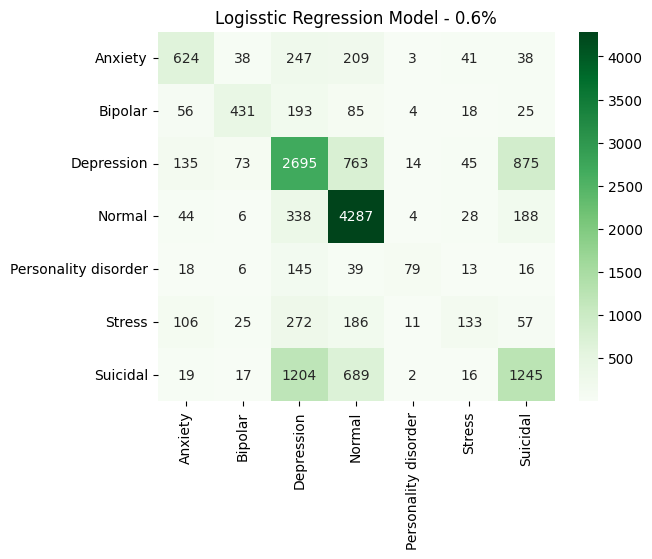

In [166]:
ax = sns.heatmap(conf_matrix_reg, annot = True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
ax.set_title(f'Logisstic Regression Model - {accuracy_reg:.2}%')
plt.show()

### Nerual Network

In [167]:
# Define the layers in an array
layers = [
    Dense(units=128, activation='relu', input_shape=(X_adj_train.shape[1],),kernel_regularizer=l2(0.01)),  # Input Layer
    BatchNormalization(),
    Dropout(rate=0.2),  # Dropout Layer 1
    Dense(units=64, activation='relu',kernel_regularizer=l2(0.01)),  # Hidden Layer 1
    Dropout(rate=0.1),  # Dropout Layer 1
    Dense(units=16, activation='relu',kernel_regularizer=l2(0.01)),  # Hidden Layer 2

    Dropout(rate=0.2),  # Dropout Layer 2
    Dense(units=len(lbl_enc.classes_), activation='softmax')  # Output Layer
]

# Initialize the Sequential model
model = Sequential(layers)


# Compile the model: Using Adam optimizer, sparse categorical crossentropy loss, and accuracy as the metric
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [168]:

# Train the model on training data with validation on the test data
history = model.fit(X_adj_train.toarray(),
                    y_train,
                    epochs=20,
                    batch_size=64,
                    validation_split=0.3
                    )


Epoch 1/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.4306 - loss: 2.9931 - val_accuracy: 0.5114 - val_loss: 1.7247
Epoch 2/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5513 - loss: 1.4505 - val_accuracy: 0.5782 - val_loss: 1.3208
Epoch 3/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5695 - loss: 1.3392 - val_accuracy: 0.5792 - val_loss: 1.2738
Epoch 4/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5785 - loss: 1.2967 - val_accuracy: 0.5850 - val_loss: 1.2658
Epoch 5/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5716 - loss: 1.2979 - val_accuracy: 0.5797 - val_loss: 1.2565
Epoch 6/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5815 - loss: 1.2786 - val_accuracy: 0.5700 - val_loss: 1.2621
Epoch 7/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5690 - loss: 1.2785 - val_accuracy: 0.5800 - val_loss: 1.2420
Epoch 8/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5819 - loss: 1.2551 - val_accuracy: 0

In [169]:

# Make predictions on the test set
y_pred_prob = model.predict(X_nouns_test.toarray())
y_pred = y_pred_prob.argmax(axis=1)  # Convert probabilities to class predictions

# Calculate the accuracy
accuracy_nn = accuracy_score(y_test, y_pred)
print("\n")
print("Accuracy:", accuracy_nn)

# Compute the confusion matrix
labels = lbl_enc.classes_
conf_matrix_nn = confusion_matrix(y_test, y_pred)

# Print classification report
print(classification_report(y_test, y_pred, target_names=labels))


494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Accuracy: 0.4589054096804809
                      precision    recall  f1-score   support

             Anxiety       0.10      0.06      0.07      1200
             Bipolar       0.15      0.07      0.09       812
          Depression       0.40      0.74      0.52      4600
              Normal       0.63      0.75      0.68      4895
Personality disorder       0.00      0.00      0.00       316
              Stress       0.07      0.01      0.01       790
            Suicidal       0.21      0.02      0.03      3192

            accuracy                           0.46     15805
           macro avg       0.22      0.23      0.20     15805
        weighted avg       0.37      0.46      0.38     15805



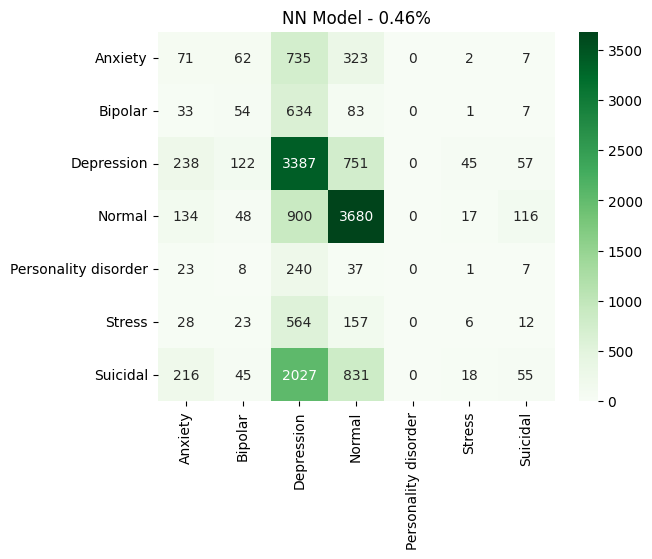

In [170]:
ax = sns.heatmap(conf_matrix_nn, annot = True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
ax.set_title(f'NN Model - {accuracy_nn:.2}%')
plt.show()

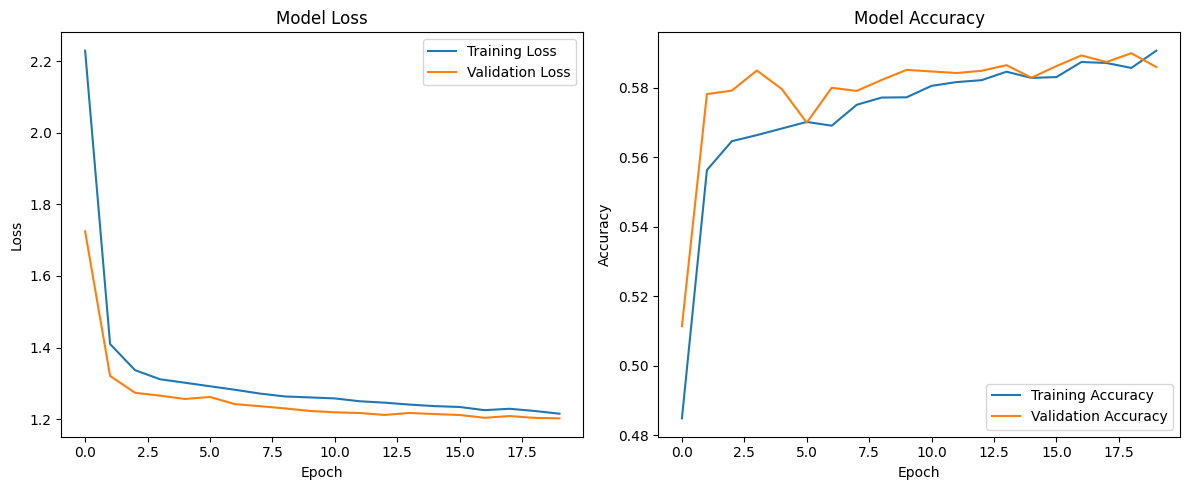

In [171]:
plt.figure(figsize=(12, 5))

# Plot training & validation loss values
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.tight_layout()  # Adjusts subplots to fit in the figure area.
plt.show()  # Display the plots

#### Model taining

## Training Based on weighted-Vector

### 🖇 Logistic Regression Model

#### Grid CV

In [215]:
# Fit the grid search on the training data
grid_search.fit(X_weighted_train, y_train)



Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=101, solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='accuracy', verbose=1)

#### Best params

In [216]:
# Get the best model and hyperparameters
best_clf = grid_search.best_estimator_
print("Best hyperparameters found: ", grid_search.best_params_)


Best hyperparameters found:  {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


#### Confusion Matrix

In [217]:
#  Predict on the test set using the best model
y_pred = best_clf.predict(X_weighted_test)

#  Calculate accuracy
accuracy_reg = accuracy_score(y_test, y_pred)
print("\nAccuracy: ", accuracy_reg)

#  Compute the confusion matrix and classification report
conf_matrix_reg = confusion_matrix(y_test, y_pred)
labels = lbl_enc.classes_
print(classification_report(y_test, y_pred, target_names=labels))


Accuracy:  0.7496994621955078
                      precision    recall  f1-score   support

             Anxiety       0.77      0.77      0.77      1200
             Bipolar       0.82      0.72      0.76       812
          Depression       0.70      0.70      0.70      4600
              Normal       0.83      0.94      0.88      4895
Personality disorder       0.73      0.52      0.61       316
              Stress       0.64      0.43      0.51       790
            Suicidal       0.66      0.63      0.65      3192

            accuracy                           0.75     15805
           macro avg       0.74      0.67      0.70     15805
        weighted avg       0.74      0.75      0.74     15805



#### Heat Map

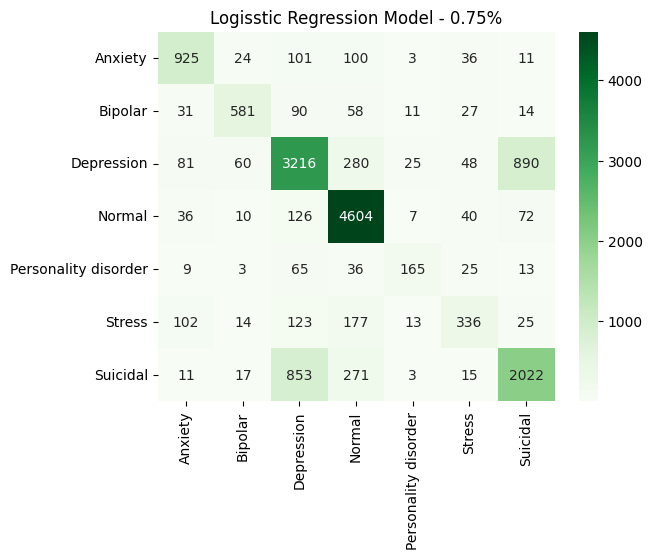

In [218]:
ax = sns.heatmap(conf_matrix_reg, annot = True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
ax.set_title(f'Logisstic Regression Model - {accuracy_reg:.2}%')
plt.show()

### Nerual Network

In [219]:
# Define the layers in an array
layers = [
    Dense(units=128, activation='relu', input_shape=(X_weighted_train.shape[1],),kernel_regularizer=l2(0.01)),  # Input Layer
    BatchNormalization(),
    Dropout(rate=0.2),  # Dropout Layer 1
    Dense(units=64, activation='relu',kernel_regularizer=l2(0.01)),  # Hidden Layer 1
    Dropout(rate=0.1),  # Dropout Layer 1
    Dense(units=16, activation='relu',kernel_regularizer=l2(0.01)),  # Hidden Layer 2

    Dropout(rate=0.2),  # Dropout Layer 2
    Dense(units=len(lbl_enc.classes_), activation='softmax')  # Output Layer
]

# Initialize the Sequential model
model = Sequential(layers)


# Compile the model: Using Adam optimizer, sparse categorical crossentropy loss, and accuracy as the metric
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [220]:

# Train the model on training data with validation on the test data
history = model.fit(X_weighted_train.toarray(),
                    y_train,
                    epochs=20,
                    batch_size=64,
                    validation_split=0.3
                    )


Epoch 1/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.4709 - loss: 3.2663 - val_accuracy: 0.6932 - val_loss: 1.6621
Epoch 2/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.7019 - loss: 1.3552 - val_accuracy: 0.7050 - val_loss: 1.1489
Epoch 3/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7186 - loss: 1.1411 - val_accuracy: 0.7161 - val_loss: 1.0911
Epoch 4/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7219 - loss: 1.1097 - val_accuracy: 0.7198 - val_loss: 1.0703
Epoch 5/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.7320 - loss: 1.0864 - val_accuracy: 0.7171 - val_loss: 1.0844
Epoch 6/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7308 - loss: 1.0847 - val_accuracy: 0.7239 - val_loss: 1.0661
Epoch 7/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.7374 - loss: 1.0803 - val_accuracy: 0.7280 - val_loss: 1.0580
Epoch 8/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7342 - loss: 1.0610 - val_accurac

In [221]:

# Make predictions on the test set
y_pred_prob = model.predict(X_weighted_test.toarray())
y_pred = y_pred_prob.argmax(axis=1)  # Convert probabilities to class predictions

# Calculate the accuracy
accuracy_nn = accuracy_score(y_test, y_pred)
print("\n")
print("Accuracy:", accuracy_nn)

# Compute the confusion matrix
labels = lbl_enc.classes_
conf_matrix_nn = confusion_matrix(y_test, y_pred)

# Print classification report
print(classification_report(y_test, y_pred, target_names=labels))


494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


Accuracy: 0.718190446061373
                      precision    recall  f1-score   support

             Anxiety       0.68      0.79      0.73      1200
             Bipolar       0.79      0.65      0.71       812
          Depression       0.67      0.72      0.69      4600
              Normal       0.82      0.91      0.86      4895
Personality disorder       0.62      0.51      0.56       316
              Stress       0.57      0.40      0.47       790
            Suicidal       0.65      0.52      0.58      3192

            accuracy                           0.72     15805
           macro avg       0.69      0.64      0.66     15805
        weighted avg       0.71      0.72      0.71     15805



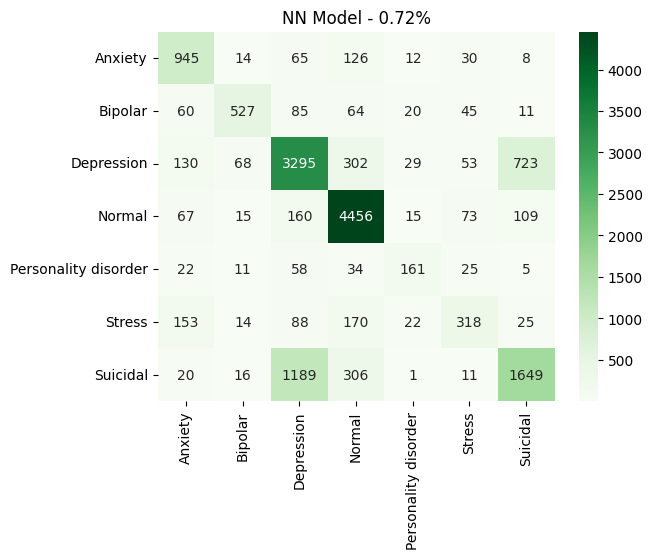

In [222]:
ax = sns.heatmap(conf_matrix_nn, annot = True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
ax.set_title(f'NN Model - {accuracy_nn:.2}%')
plt.show()

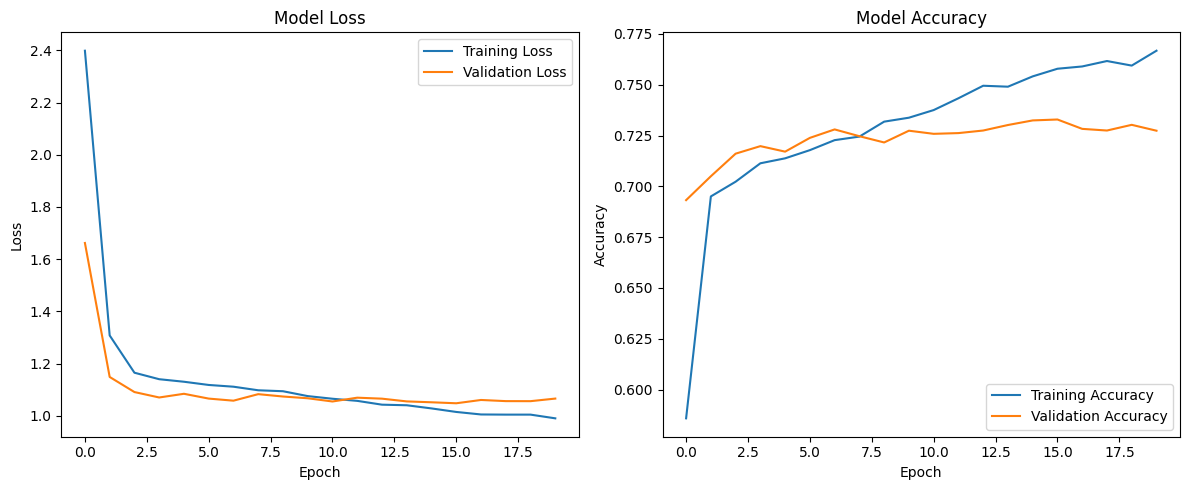

In [223]:
plt.figure(figsize=(12, 5))

# Plot training & validation loss values
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.tight_layout()  # Adjusts subplots to fit in the figure area.
plt.show()  # Display the plots

## Training Based on stemm-Vector

### 🖇 Logistic Regression Model

#### Grid CV

In [208]:
# Fit the grid search on the training data
grid_search.fit(X_stemm_train, y_train)



Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=101, solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='accuracy', verbose=1)

#### Best params

In [209]:
# Get the best model and hyperparameters
best_clf = grid_search.best_estimator_
print("Best hyperparameters found: ", grid_search.best_params_)


Best hyperparameters found:  {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


#### Confusion Matrix

In [210]:
#  Predict on the test set using the best model
y_pred = best_clf.predict(X_stemm_test)

#  Calculate accuracy
accuracy_reg = accuracy_score(y_test, y_pred)
print("\nAccuracy: ", accuracy_reg)

#  Compute the confusion matrix and classification report
conf_matrix_reg = confusion_matrix(y_test, y_pred)
labels = lbl_enc.classes_
print(classification_report(y_test, y_pred, target_names=labels))


Accuracy:  0.7676684593483075
                      precision    recall  f1-score   support

             Anxiety       0.79      0.78      0.78      1200
             Bipolar       0.83      0.70      0.76       812
          Depression       0.72      0.73      0.72      4600
              Normal       0.85      0.96      0.90      4895
Personality disorder       0.79      0.53      0.63       316
              Stress       0.65      0.44      0.53       790
            Suicidal       0.70      0.65      0.68      3192

            accuracy                           0.77     15805
           macro avg       0.76      0.68      0.71     15805
        weighted avg       0.76      0.77      0.76     15805



#### Heat Map

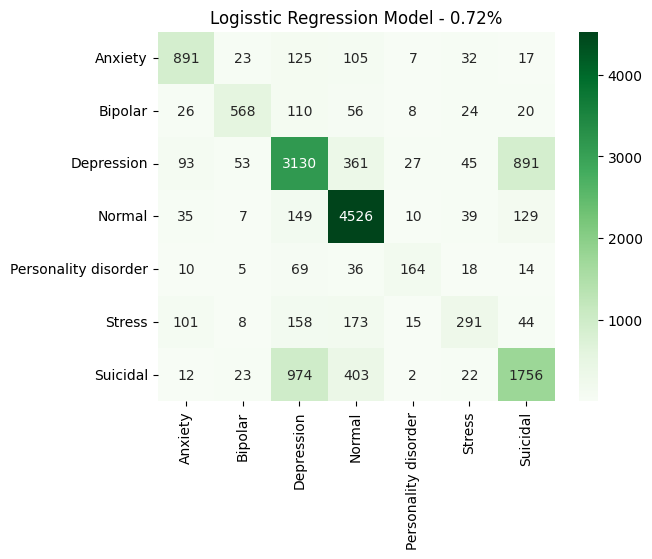

In [ ]:
ax = sns.heatmap(conf_matrix_reg, annot = True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
ax.set_title(f'Logisstic Regression Model - {accuracy_reg:.2}%')
plt.show()

### Nerual Network

In [211]:
# Define the layers in an array
layers = [
    Dense(units=128, activation='relu', input_shape=(X_weighted_train.shape[1],),kernel_regularizer=l2(0.01)),  # Input Layer
    BatchNormalization(),
    Dropout(rate=0.2),  # Dropout Layer 1
    Dense(units=64, activation='relu',kernel_regularizer=l2(0.01)),  # Hidden Layer 1
    Dropout(rate=0.1),  # Dropout Layer 1
    Dense(units=16, activation='relu',kernel_regularizer=l2(0.01)),  # Hidden Layer 2

    Dropout(rate=0.2),  # Dropout Layer 2
    Dense(units=len(lbl_enc.classes_), activation='softmax')  # Output Layer
]

# Initialize the Sequential model
model = Sequential(layers)


# Compile the model: Using Adam optimizer, sparse categorical crossentropy loss, and accuracy as the metric
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [212]:

# Train the model on training data with validation on the test data
history = model.fit(X_weighted_train.toarray(),
                    y_train,
                    epochs=20,
                    batch_size=64,
                    validation_split=0.3
                    )


Epoch 1/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.4931 - loss: 3.2756 - val_accuracy: 0.6815 - val_loss: 1.6889
Epoch 2/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6871 - loss: 1.3979 - val_accuracy: 0.7002 - val_loss: 1.1513
Epoch 3/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6938 - loss: 1.1643 - val_accuracy: 0.7019 - val_loss: 1.1067
Epoch 4/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7052 - loss: 1.1259 - val_accuracy: 0.6972 - val_loss: 1.1091
Epoch 5/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7089 - loss: 1.1132 - val_accuracy: 0.6996 - val_loss: 1.0817
Epoch 6/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7099 - loss: 1.1011 - val_accuracy: 0.7077 - val_loss: 1.0803
Epoch 7/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7135 - loss: 1.0994 - val_accuracy: 0.7009 - val_loss: 1.0835
Epoch 8/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7282 - loss: 1.0714 - val_accuracy: 0

In [213]:

# Make predictions on the test set
y_pred_prob = model.predict(X_weighted_test.toarray())
y_pred = y_pred_prob.argmax(axis=1)  # Convert probabilities to class predictions

# Calculate the accuracy
accuracy_nn = accuracy_score(y_test, y_pred)
print("\n")
print("Accuracy:", accuracy_nn)

# Compute the confusion matrix
labels = lbl_enc.classes_
conf_matrix_nn = confusion_matrix(y_test, y_pred)

# Print classification report
print(classification_report(y_test, y_pred, target_names=labels))


494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Accuracy: 0.6981967731730465
                      precision    recall  f1-score   support

             Anxiety       0.75      0.70      0.72      1200
             Bipolar       0.77      0.66      0.71       812
          Depression       0.64      0.67      0.65      4600
              Normal       0.83      0.87      0.85      4895
Personality disorder       0.69      0.47      0.56       316
              Stress       0.56      0.37      0.44       790
            Suicidal       0.57      0.58      0.58      3192

            accuracy                           0.70     15805
           macro avg       0.68      0.62      0.64     15805
        weighted avg       0.70      0.70      0.69     15805



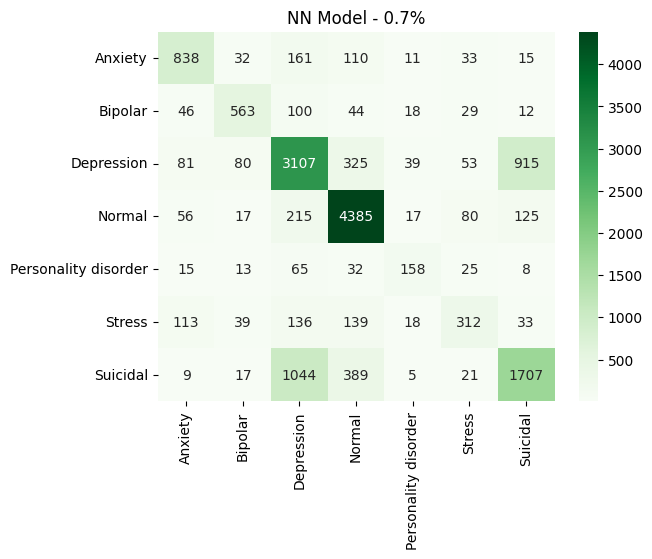

In [ ]:
ax = sns.heatmap(conf_matrix_nn, annot = True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
ax.set_title(f'NN Model - {accuracy_nn:.2}%')
plt.show()

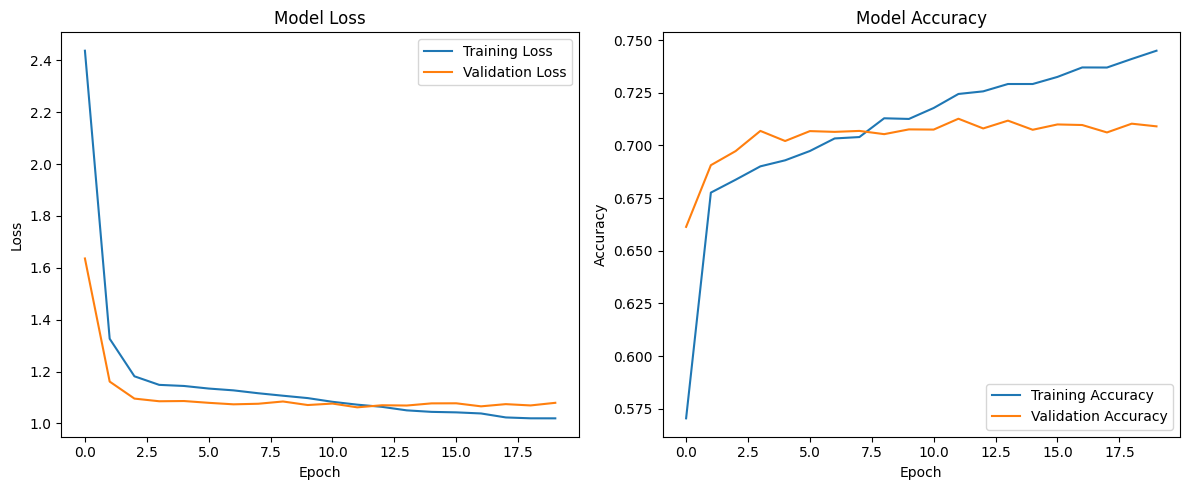

In [ ]:
plt.figure(figsize=(12, 5))

# Plot training & validation loss values
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.tight_layout()  # Adjusts subplots to fit in the figure area.
plt.show()  # Display the plots

---
## End
---

<img src="https://img.freepik.com/free-vector/flat-world-mental-health-day-background_23-2149671212.jpg" alt="Sample Image" width="100%" height="417">
